# Perceptron

In [13]:
#モジュールの読み込み
import numpy as np

#Perceptron関数の定義
class Perceptron(object):
    #コンストラクタでインスタンスの初期設定
    
    #学習率0.02, 訓練回数100回
    def __init__(self, lr=0.02, n_iter=100, random_state=1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state
        
    #訓練データを適合させる関数の定義
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        #locは平均、scaleは標準偏差
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.error_ = []

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.error_.append(error)
        return self
    
    
#　　　　　　　　　各分布の生成
#
#         一様分布の乱数生成
#         numpy.random.rand(): 0.0以上、1.0未満
#         numpy.random.random_sample(): 0.0以上、1.0未満
#         numpy.random.randint(): 任意の範囲の整数
#
#         正規分布の乱数生成
#         numpy.random.randn(): 平均0、分散1（標準偏差1）
#         numpy.random.normal(): 任意の平均、標準偏差
#
#         二項分布の乱数生成
#         numpy.random.binomial()
#
#         ベータ分布の乱数生成
#         numpy.random.beta()
#
#         ガンマ分布の乱数生成
#         numpy.random.gamma()
#
#         カイ二乗分布の乱数
#         numpy.random.chisquare()
            

    #総入力の関数の定義
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    #予測値の関数の定義
    def predict(self, X):
        #np.where(条件, 満たす場合, 満たさない場合)
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Irisデータの読み込み

In [14]:
#モジュールの読み込み
import os
import pandas as pd

#Irisデータセットを公開しているGitHubのURL
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

#csvファイルを読み込み
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

#データを下から5件表示
df.tail(5)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
#csvファイルを読み込み
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
#データを下から5件表示
df.tail(5)

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Irisデータを可視化

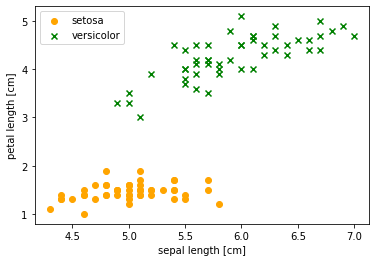

In [16]:
#モジュールの読み込み
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1-100行目×4列(目的変数)の抽出
y = df.iloc[0:100, 4].values
#y==Iris-setosaならば-1,誤りなら1
y = np.where(y == 'Iris-setosa', -1, 1)

# 1-100行目の1.3列目を抽出
X = df.iloc[0:100, [0, 2]].values

# プロット
plt.scatter(X[:50, 0], X[:50, 1],
            color='orange', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#グラフの可視化
plt.show()

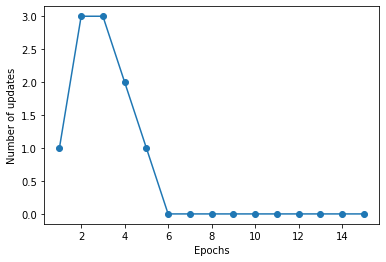

In [17]:
ex = Perceptron(lr=0.01, n_iter=15)

ex.fit(X, y)

plt.plot(range(1, len(ex.error_) + 1), ex.error_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# グラフの可視化
plt.show()

### 決定境界の可視化

In [21]:
#モジュールの読み込み
from matplotlib.colors import ListedColormap

#決定境界を可視化する関数
def plot_decision_line(X, y, classifier, resolution=0.02):

    # マーカーとカラーマップの設定
    markers = ('s', 'x', 'o', '^', 'v')
    sensy_accent =  ('#5073ED', '#FA8EB5', '#A7C0FD', '#4B4C80', '#F4458C')
    #np.unique()は重複を削除した配列
    cmap = ListedColormap(sensy_accent[:len(np.unique(y))])

    # 決定領域
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #配列の要素から格子列を生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    #predictで予測
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #reshapeで配列の形状を変更
    Z = Z.reshape(xx1.shape)
    #contourf()は等高線を表す
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #x軸とy軸の範囲を制限
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for ix, lc in enumerate(np.unique(y)):
        plt.scatter(x=X[y == lc, 0], 
                    y=X[y == lc, 1],
                    alpha=0.8, 
                    c=colors[ix],
                    marker=markers[ix], 
                    label=lc, 
                    edgecolor='black')

/opt/anaconda3/envs/環境名　tensorflow-gpu=1.14/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


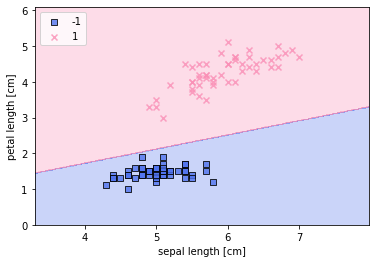

In [23]:
#決定境界の関数を呼び出し
plot_decision_line(X, y, classifier=ex)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# グラフの表示
plt.show()